In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib
import json, yaml

In [23]:
generalist = [5.686223507, 6.548550129, 6.928010941, 7.398015976, 7.69802618, 7.94879818, 8.114271164, 8.215163231, 8.281991005, 8.355433464, 8.677797318]
ens_k02 = [6.87611, 7.71627, 8.41654, 8.54977, 8.71643, 8.77522, 8.74151, 8.73751, 8.48958, 8.7909, 8.83498]
ens_k05 = [7.00844, 7.69754, 8.45829, 8.72773, 8.79836, 8.8305, 8.84711, 8.87851, 8.87753, 8.72353, 8.78994]
ens_k10 = [7.24362, 8.0331, 8.58715, 8.84744, 8.87064, 8.8916, 9.05862, 9.02292, 8.92153, 8.96032, 9.07627]

ens_k02_ft = [7.02923, 7.8014, 8.62635, 8.80511, 8.94309]
ens_k05_ft = [7.4213, 8.16028, 8.8272, 9.03956, 9.07447]
ens_k10_ft = [7.69023, 8.46461, 8.97168, 9.18435, 9.17397]

# Plot Test SI-SDR Improvement

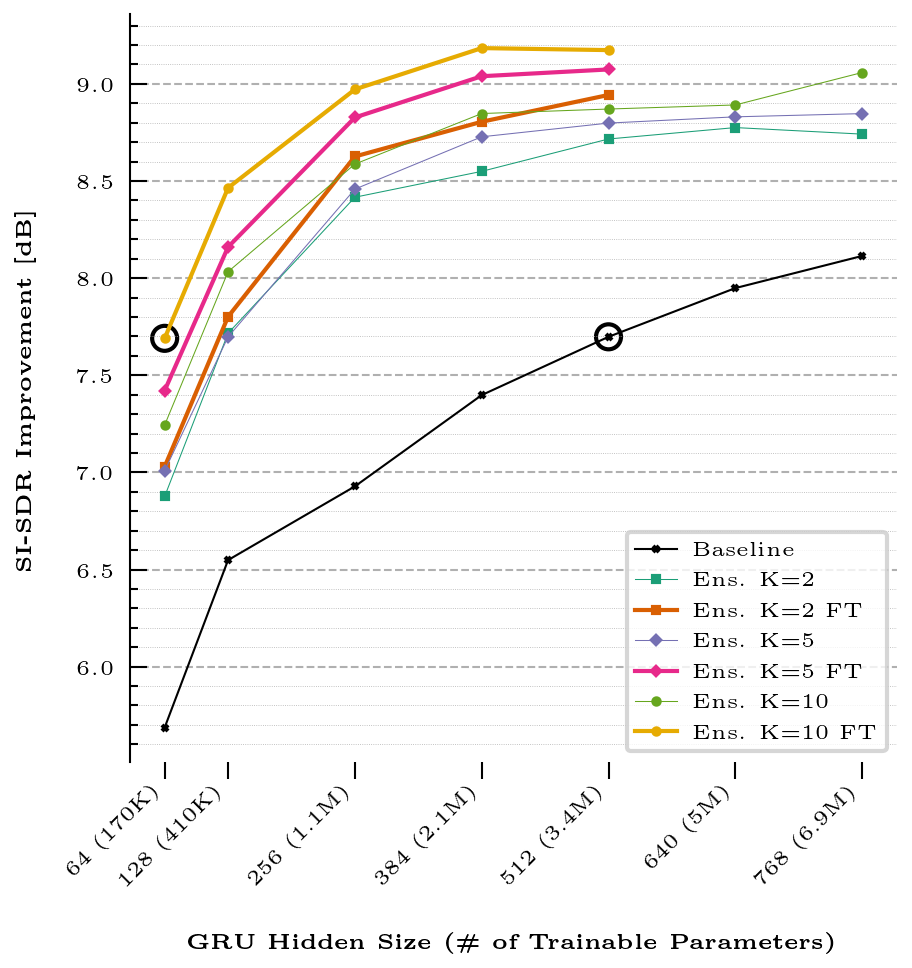

In [74]:
plt.style.use(['science', 'ieee'])
plt.rcParams['text.latex.preamble'] = '' #r'\renewcommand\bfdefault{b}'

c_blue = '#332288'
c_green = '#117733'
c_teal = '#44AA99'
c_sky = '#88CCEE'
c_gold = '#DDCC77'
c_pink = '#CC6677'
c_violet = '#AA4499'
c_red = '#D50000'

g_markersize = 2
g_labelsize = 5
g_labelpad = 10

def human_format(num):
    num = float('{:.2g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

fig, ax = plt.subplots(figsize=(3.3, 3.3), dpi=300)

l = 7
hs = [64, 128, 256, 384, 512, 640, 768, 896, 1024, 1152, 1280][:l]
n_params = [169473, 412161, 1118721, 2120193, 3416577, 5007873, 6894081, 9075201, 11551233, 14322177, 17388033][:l]
labels = ['{} ({})'.format(v1, human_format(v2)) for (v1, v2) in zip(hs, n_params)]
x = hs
colors = iter([plt.cm.Dark2(i) for i in range(10)])
ax.plot(x[:l], generalist[:l],
        markersize=1*1.5,
        marker='x',
        linestyle='-',
        linewidth=0.5,
        label='Baseline', c='k')
ax.plot(x[:l], ens_k02[:l],
        markersize=1*1.5,
        marker='s',
        linestyle='-',
        linewidth=0.25,
        label='Ens. K=2', c=next(colors))
ax.plot(x[:5], ens_k02_ft[:l],
        markersize=1*1.5,
        marker='s',
        linestyle='-',
        linewidth=1,
        label='Ens. K=2 FT', c=next(colors))
ax.plot(x[:l], ens_k05[:l],
        markersize=1*1.5,
        marker='D',
        linestyle='-',
        linewidth=0.25,
        label='Ens. K=5', c=next(colors))
ax.plot(x[:5], ens_k05_ft[:l],
        markersize=1*1.5,
        marker='D',
        linestyle='-',
        linewidth=1,
        label='Ens. K=5 FT', c=next(colors))
ax.plot(x[:l], ens_k10[:l],
        markersize=1*1.5,
        marker='o',
        linestyle='-',
        linewidth=0.25,
        label='Ens. K=10', c=next(colors))
ax.plot(x[:5], ens_k10_ft[:l],
        markersize=1*1.5,
        marker='o',
        linestyle='-',
        linewidth=1,
        label='Ens. K=10 FT', c=next(colors))
ax.set_xticks(x[:l])
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.scatter(x[0], ens_k10_ft[0], marker='o', facecolor='none', edgecolor='k')
ax.scatter(x[4], generalist[4], marker='o', facecolor='none', edgecolor='k')

# secax = ax.secondary_xaxis('top')
# secax.tick_params(axis='x', which='major', labelsize=g_labelsize, length=0.01, top=False, bottom=False)
# #     ax.set_xscale('log')
# secax.set_xticks(hs)
# # secax.set_xticklabels(['cat'])
# # secax.set_xticklabels([str(k) for k in hs], fontsize=g_labelsize)
# # ax.set_xticklabels([human_format(k) for k in n_params], fontsize=g_labelsize)
# secax.set_xlabel(r'\textbf{Number of Parameters}', fontsize=g_labelsize, labelpad=g_labelpad)
# secax.xaxis.set_major_formatter(lambda x, pos: human_format(x))

# ax.text()

# ax.set_yticks(np.arange(4, 14))

ax.set_ylabel(r'\textbf{SI-SDR Improvement [dB]}', fontsize=g_labelsize, labelpad=g_labelpad)
ax.set_xlabel(r'\textbf{GRU Hidden Size (\# of Trainable Parameters)}', fontsize=g_labelsize, labelpad=g_labelpad)

ax.grid(which='major', axis='y', linestyle='--')
ax.grid(which='minor', axis='y', linestyle=':', linewidth=0.2)
ax.tick_params(axis='x', which='major', labelsize=g_labelsize, length=4, pad=0, direction='out', top=False)
ax.tick_params(axis='y', which='major', labelsize=g_labelsize, length=4, right=False)
ax.tick_params(axis='x', which='minor', top=False, bottom=False)
ax.tick_params(axis='y', which='minor', length=2, right=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend(loc="lower right", frameon=True, mode="", ncol=1, fontsize=g_labelsize)
plt.savefig('fig_results.pdf', pad_inches=0)
plt.show()

# Plot Validation Losses

se-hs=0064_K=10_k=09 -13.458819389343262
se-hs=0128_K=10_k=09 -14.337495803833008
se-hs=0256_K=10_k=09 -14.794705390930176
se-hs=0384_K=10_k=09 -15.056427955627441
se-hs=0512_K=10_k=09 -15.173404693603516
se-hs=0640_K=10_k=09 -15.135246276855469
se-hs=0768_K=10_k=09 -15.134252548217773
se-hs=0896_K=10_k=09 -15.250186920166016
se-hs=1024_K=10_k=09 -15.177583694458008
se-hs=1152_K=10_k=09 -15.060276985168457
se-hs=1280_K=10_k=09 -15.106298446655273


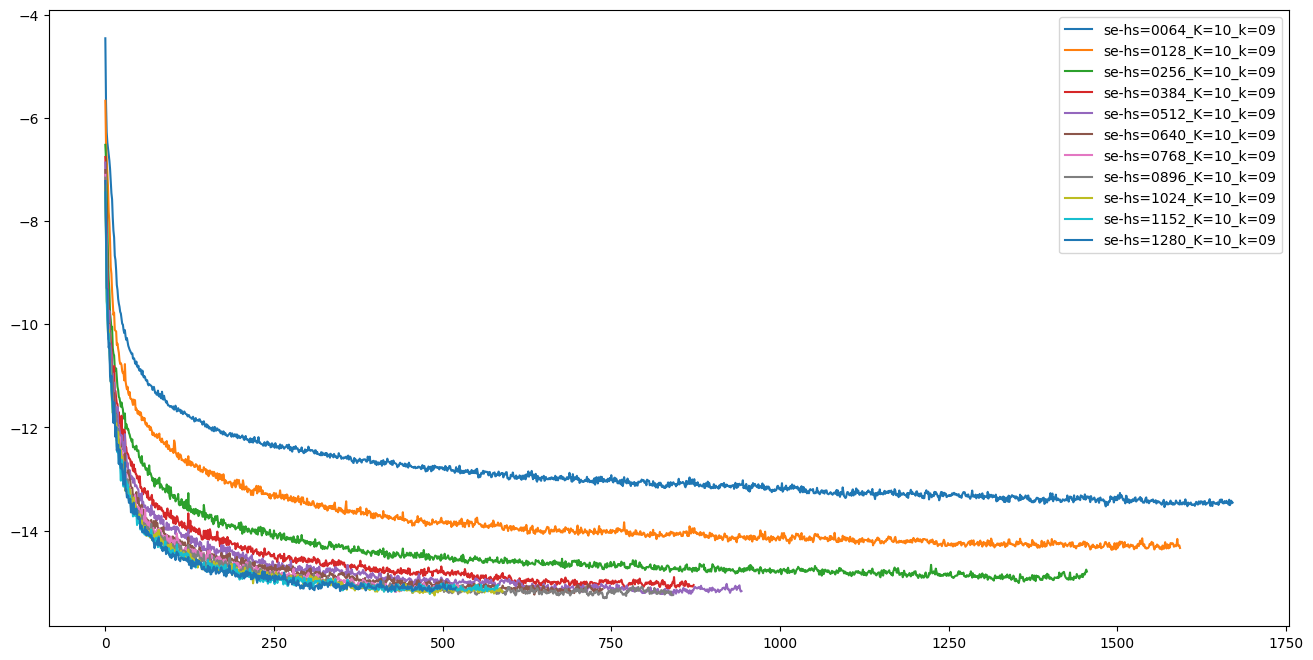

In [89]:
plt.style.use('default')
fig = plt.figure(figsize=(16,8))
for f in sorted(pathlib.Path('/media/sdb1/asivara/Research/2021_waspaa/weights/specialists/').rglob('errors.json')):
    if '_K=10_k=09' not in str(f):
        continue
    with open(f, 'r') as fp:
        l = json.load(fp)
        print(f.parent.stem, l[-1])
        plt.plot(l, label=f.parent.stem)

plt.legend()
plt.show()